<a href="https://colab.research.google.com/github/AlbertRoca29/EconomiaCircular/blob/main/Script_exploraci%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import data and libraries
!pip install geopandas

import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

# Tweets comptes 
urlT = 'https://github.com/AlbertRoca29/EconomiaCircular/blob/main/Tweets.csv?raw=true'
T = pd.read_csv(urlT)

# Tweets tots
urlTAll = 'https://github.com/AlbertRoca29/EconomiaCircular/blob/main/Tweets_All.xlsx?raw=true'
T_All = pd.read_excel(urlTAll,engine='openpyxl')


In [157]:
#@title <h5> Fix some variables 
# Datetime format
T['Date'] = pd.to_datetime(T['Date'])
T_All['Date'] = pd.to_datetime(T_All['Date'])

# Remove year 2023
T = T[(T['Date'].dt.year > 2007) & (T['Date'].dt.year < 2023)]
T_All = T_All[(T_All['Date'].dt.year > 2007) & (T_All['Date'].dt.year < 2023)]

# Index
T['Index'] = 1 + np.log(1+ T_All['Retweets'])
T_All['Index'] = 1 + np.log(1+ T_All['Retweets'])



In [158]:
#@title <h5> Functions to download data

from IPython.display import display
import ipywidgets as widgets
from google.colab import files
from IPython.display import HTML


def button_download_df(df, filename):
    button = widgets.Button(description="Download data")

    button.layout.margin = '25px'
    button.layout.width = "140px"
    button.layout.height= "40px"

    css = HTML(f"""
        <style>
            .custom-button {{
                font-family: 'Verdana', sans-serif !important;
                font-size: 13px !important;
                font-weight:bold;
            }}
        </style>
    """)
    display(css)
    
    # Set the custom CSS class for the button
    button.add_class('custom-button')
    display(button)

    def on_button_click(b):
        df.to_excel(f"{filename}.xlsx", index=False)
        files.download(f"{filename}.xlsx")

    button.on_click(on_button_click)



**Selected dates** : from 01-01-2008 to 31-12-2022

**Formula for indices**: Index of the tweet ($Index$), number of retweets ($R$)

$ Index = 1 + log(1+ R) $


| Paraules | 
|:-|
Minimització de residus
Producció neta
Zero emissions / Emissions zero
Economia verda
Triple balanç
Reciclatge
Avaluació del Cicle de Vida / Anàlisi del Cicle de Vida
Consum sostenible
decreixement / Creixement zero / Zero creixement, 
Responsabilitat Social Corporativa / RSC
Responsabilitat Social Universitaria / RSU
Economia blava
Creació de valor compartit / Valor compartit
Ecologia industrial
Economia col·laborativa
Economia circular


# Anàlisi dels twits dels comptes escollits



In [159]:
#@title Grups i comptes escollits

Comptes = {
    'Diaris': ['diariARA','elnacionalcat','VilaWeb','324cat','CatalunyaRadio','rac1'],
    'Administracions Públiques': ['govern','generalitat' ,'gencat' ,'diba','DiputacioGirona' ,'DiputacioLleida' ,'Dipta_cat'],
    'Universitats': ['uabbarcelona ','uabbarcelona ','upfbarcelona ','la_upc ','univgirona ','UdL_info ','universitatURV '],
    'Patronals': ['pimec ','FomentTreball ','PatronalCecot'],
    'Sindicats': ['ccoocatalunya ','ugtcatalunya ','cgtcatalunya ','LaIntersindical'],
}

# find the maximum length of any email list
max_len = max([len(email_list) for email_list in Comptes.values()])

# pad shorter lists with empty strings
for email_list in Comptes.values():
    while len(email_list) < max_len:
        email_list.append('')

# print the group headers
for group in Comptes.keys():
    print(f"{group.capitalize():<29}", end='')
print()

# print a separator line
print("-" * (29 * len(Comptes)))

# print the emails in columns
for i in range(max_len):
    for group, email_list in Comptes.items():
        print(f"{email_list[i]:<29}", end='')
    print()






Diaris                       Administracions públiques    Universitats                 Patronals                    Sindicats                    
-------------------------------------------------------------------------------------------------------------------------------------------------
diariARA                     govern                       uabbarcelona                 pimec                        ccoocatalunya                
elnacionalcat                generalitat                  uabbarcelona                 FomentTreball                ugtcatalunya                 
VilaWeb                      gencat                       upfbarcelona                 PatronalCecot                cgtcatalunya                 
324cat                       diba                         la_upc                                                    LaIntersindical              
CatalunyaRadio               DiputacioGirona              univgirona                                                        

In [160]:
#@title Nombre de twits (reals i seguint l'index) 2008 - Actualitat per a cada organització

T['Index'] = 1+ np.log(1+ T['Retweets'])

Tgrup = T.groupby('Grup')["Index"].agg({"size",'sum'}).rename(columns={"size": "Twits", "sum": "Twits index"}).astype({"Twits index": int}).reset_index('Grup')

Tgrup['% Twits'] = (Tgrup['Twits'] / Tgrup['Twits'].sum() * 100).round(1)
Tgrup['% Twits index'] = (Tgrup['Twits index'] / Tgrup['Twits index'].sum() * 100).round(1)

print(Tgrup.to_string(index=False))


button_download_df(Tgrup,'Grups')

                    Grup  Twits index  Twits  % Twits  % Twits index
Administracions_Pubiques          573    260     26.8           26.2
                  Diaris          995    427     44.0           45.5
               Patronals          252    123     12.7           11.5
               Sindicats          139     58      6.0            6.4
            Universitats          228    103     10.6           10.4


Button(description='Download data', layout=Layout(height='40px', margin='25px', width='140px'), style=ButtonSt…

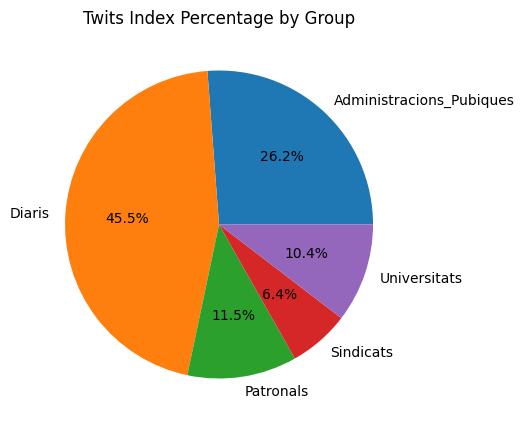

In [161]:
#@title Group Pie chart, per Twits Index

plt.figure(figsize=(5,5))
plt.pie(Tgrup['% Twits index'], labels=Tgrup['Grup'], autopct='%1.1f%%')
plt.title('Twits Index Percentage by Group')
plt.show()


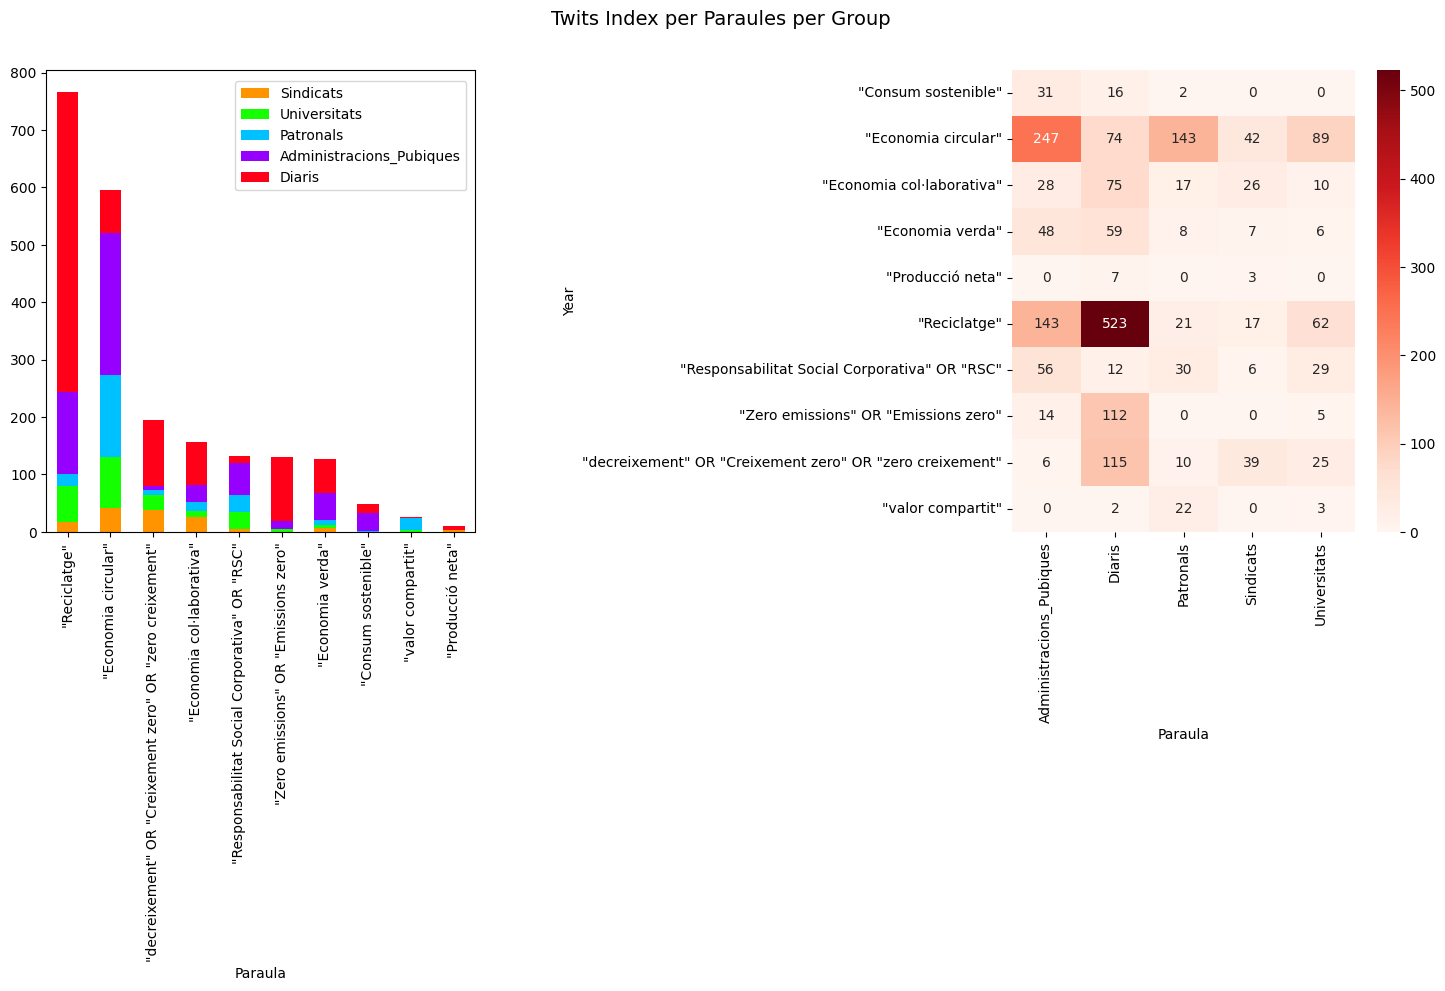

Button(description='Download data', layout=Layout(height='40px', margin='25px', width='140px'), style=ButtonSt…

In [162]:
#@title Paraules Bar Plot, per Twits Index

fig, ax = plt.subplots(figsize=(18,6), ncols=2, gridspec_kw={'height_ratios': [1]})
fig.subplots_adjust(wspace=1.25)


fig.suptitle('Twits Index per Paraules per Group', fontsize=14)
hsv = plt.get_cmap('hsv')
colors = hsv(np.linspace(0.1, 1, len(np.unique(T['Grup']))))

bot = T.groupby(['Paraula','Grup'])['Index'].sum().groupby('Paraula').sum()

ind = np.argsort(bot)[::-1]

bot = bot[ind]-bot[ind]

zero = bot.copy()
# fig.subplots_adjust(hspace=20.5)


for i, grup in enumerate(list(T['Grup'].value_counts().sort_values().keys())):
    T_p = T[T['Grup']==grup]
    Pr = ((zero + T_p.groupby('Paraula')['Index'].sum())[ind]).fillna(0)
    Pr.plot(kind='bar',color=colors[i],label=grup,bottom=bot, ax = ax[0])
    bot += Pr
    ax[0].legend(bbox_to_anchor=(0.425, 0.99),fontsize="10" ,loc='upper left')

pivot = pd.pivot_table(T, index='Paraula', columns='Grup', values='Index', aggfunc=np.sum).fillna(0)

# plt.figure(figsize=(pivot.shape[1],pivot.shape[0]*0.8))
sns.heatmap(pivot, cmap='Reds', annot=True, fmt='.0f')
# plt.title('Index by Year and Paraula')
ax[1].set_xlabel('Paraula')
ax[1].set_ylabel('Year')
ax[1].yaxis.set_ticklabels(pivot.index)


plt.show()

button_download_df(pivot,'Twits_Paraules_Grup')


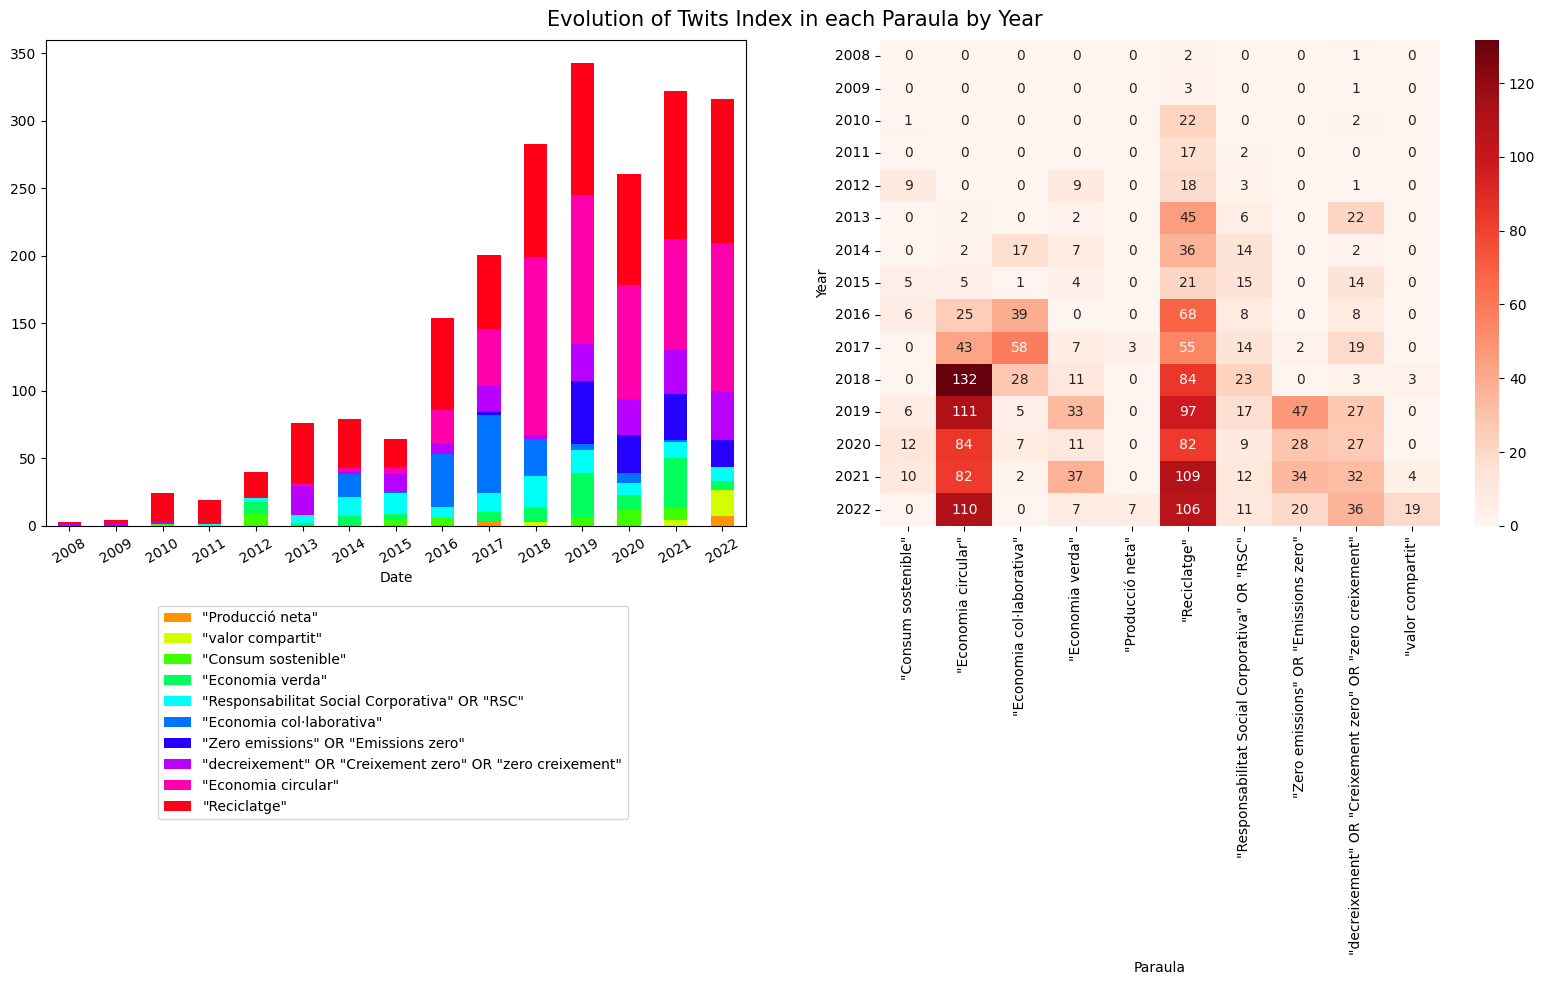

Button(description='Download data', layout=Layout(height='40px', margin='25px', width='140px'), style=ButtonSt…

In [163]:
#@title Evolució del nombre de Twits Index en cada paraula per any

fig, ax = plt.subplots(figsize=(16,10), ncols=2)
fig.subplots_adjust(wspace=0.5)
hsv = plt.get_cmap('hsv')
colors = hsv(np.linspace(0.1, 1, len(np.unique(T['Paraula']))))
bot = T.groupby(pd.Grouper(key='Date', freq='Y'))['Index'].sum()
bot -= bot
zero = bot.copy()

fig.suptitle('Evolution of Twits Index in each Paraula by Year', fontsize=15)


for i, paraula in enumerate(list(T['Paraula'].value_counts().sort_values().keys())):
    T_p = T[T['Paraula']==paraula]
    year = (zero + T_p.groupby(pd.Grouper(key='Date', freq='Y'))['Index'].sum()).fillna(0)
    year.plot(kind='bar', color=colors[i], label=paraula, bottom=bot, ax=ax[0])
    bot += year
    ax[0].legend(bbox_to_anchor=(0.15, -0.15),fontsize="10" ,loc='upper left')
ax[0].set_xticks(np.arange(15))
ax[0].set_xticklabels(np.arange(2008, 2023), rotation=30)

# plot 2: heatmap
pivot = pd.pivot_table(T, index=pd.Grouper(key='Date', freq='Y'), columns='Paraula', values='Index', aggfunc=np.sum).fillna(0)

sns.heatmap(pivot, cmap='Reds', annot=True, fmt='.0f', ax=ax[1])



ax[1].set_xlabel('Paraula')
ax[1].set_ylabel('Year')
ax[1].yaxis.set_ticklabels(pivot.index.strftime('%Y'))

# adjust layout
plt.tight_layout()
plt.show()

button_download_df(pivot,'Twits_Paraula_Year')

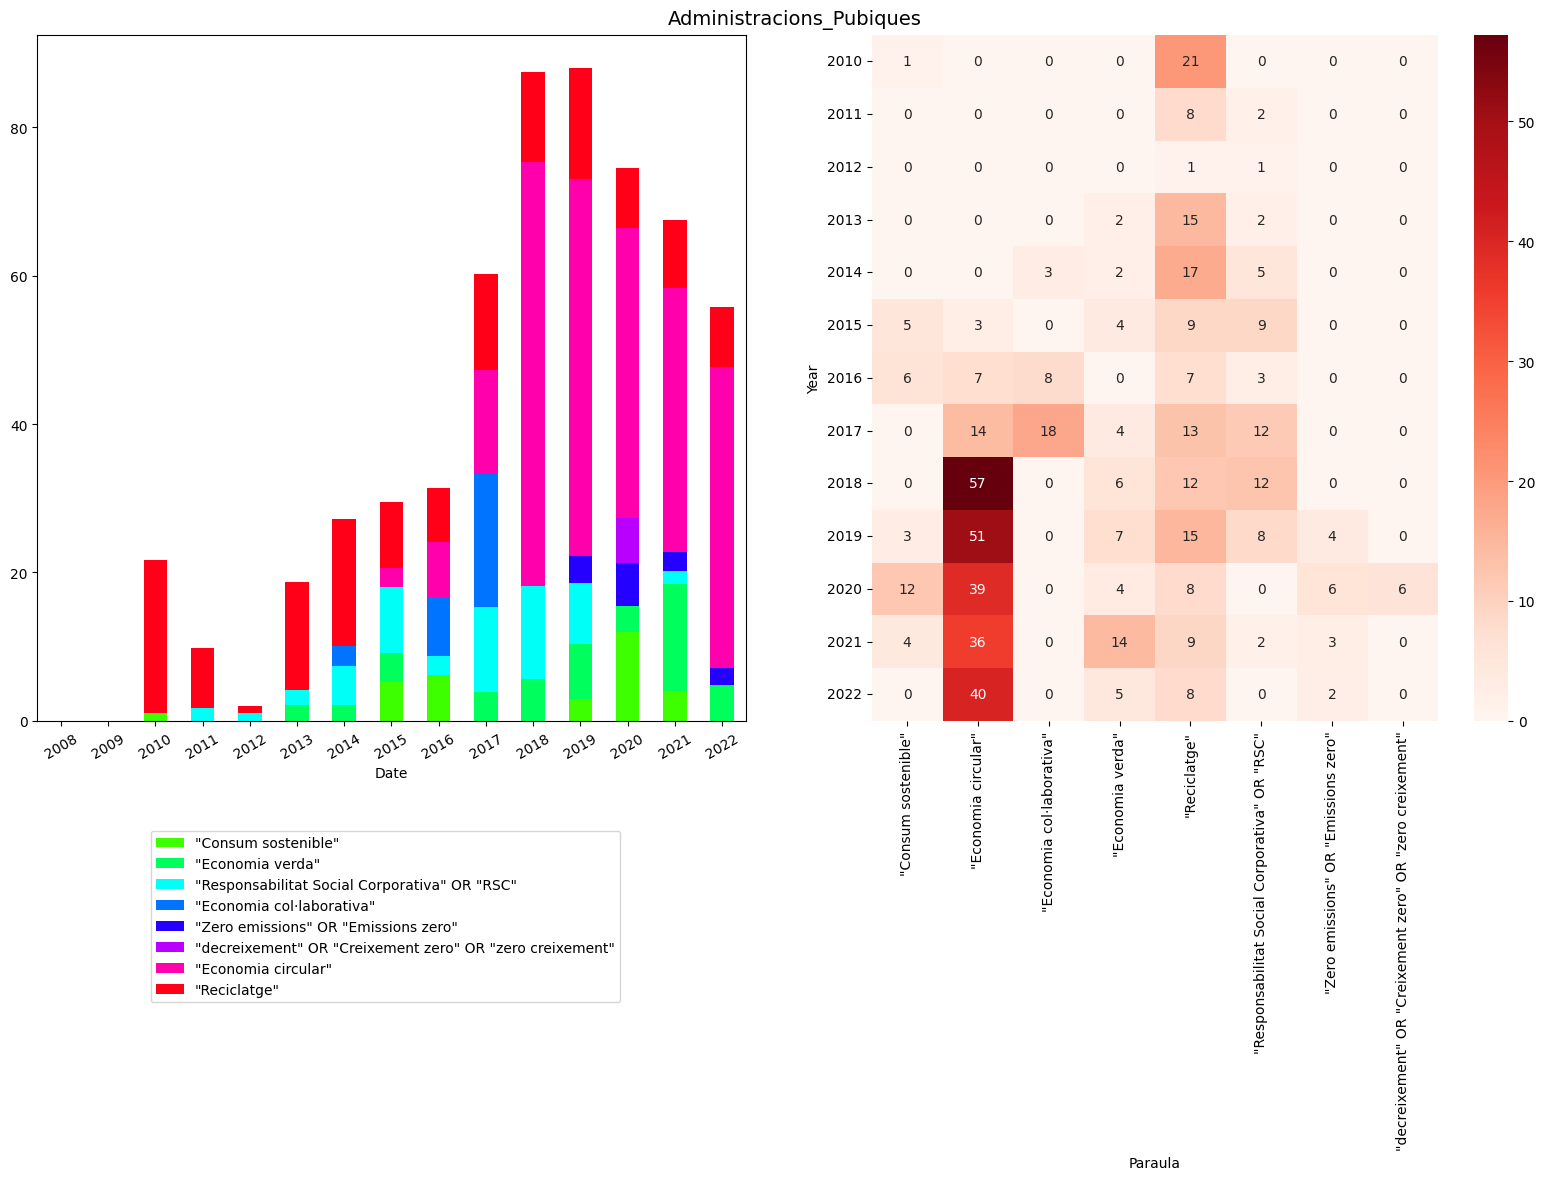

Button(description='Download data', layout=Layout(height='40px', margin='25px', width='140px'), style=ButtonSt…

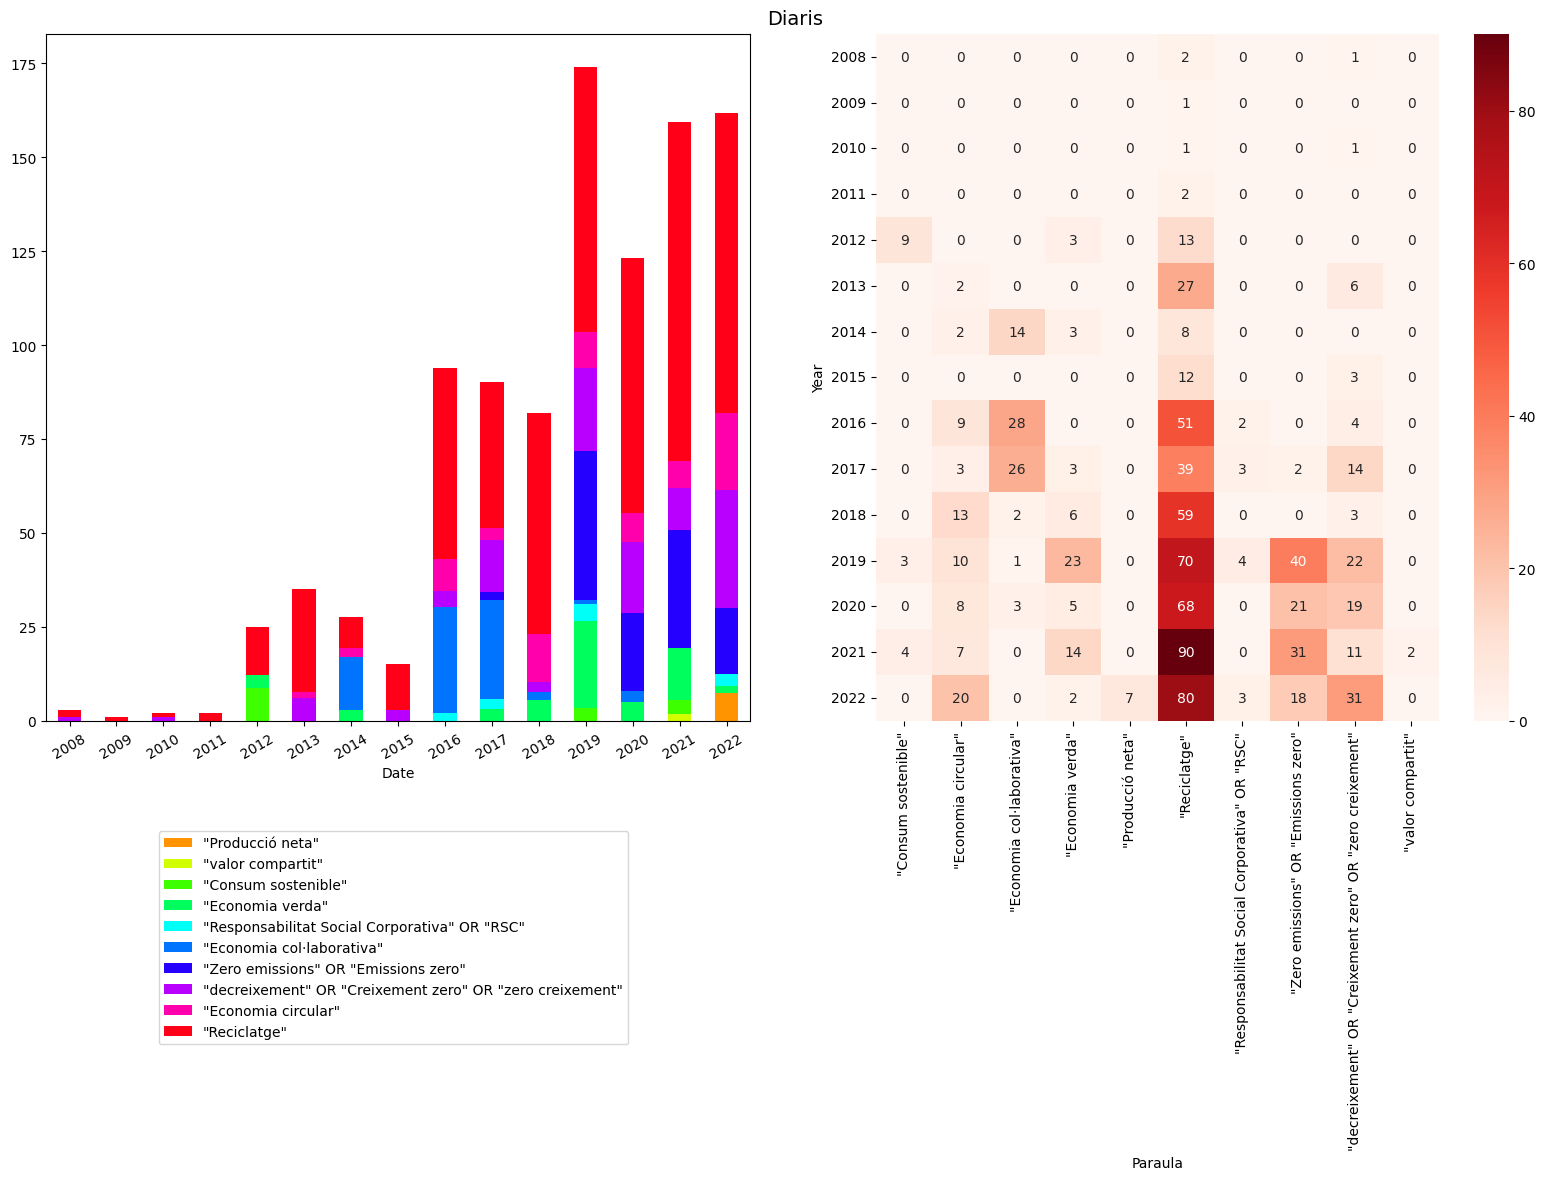

Button(description='Download data', layout=Layout(height='40px', margin='25px', width='140px'), style=ButtonSt…

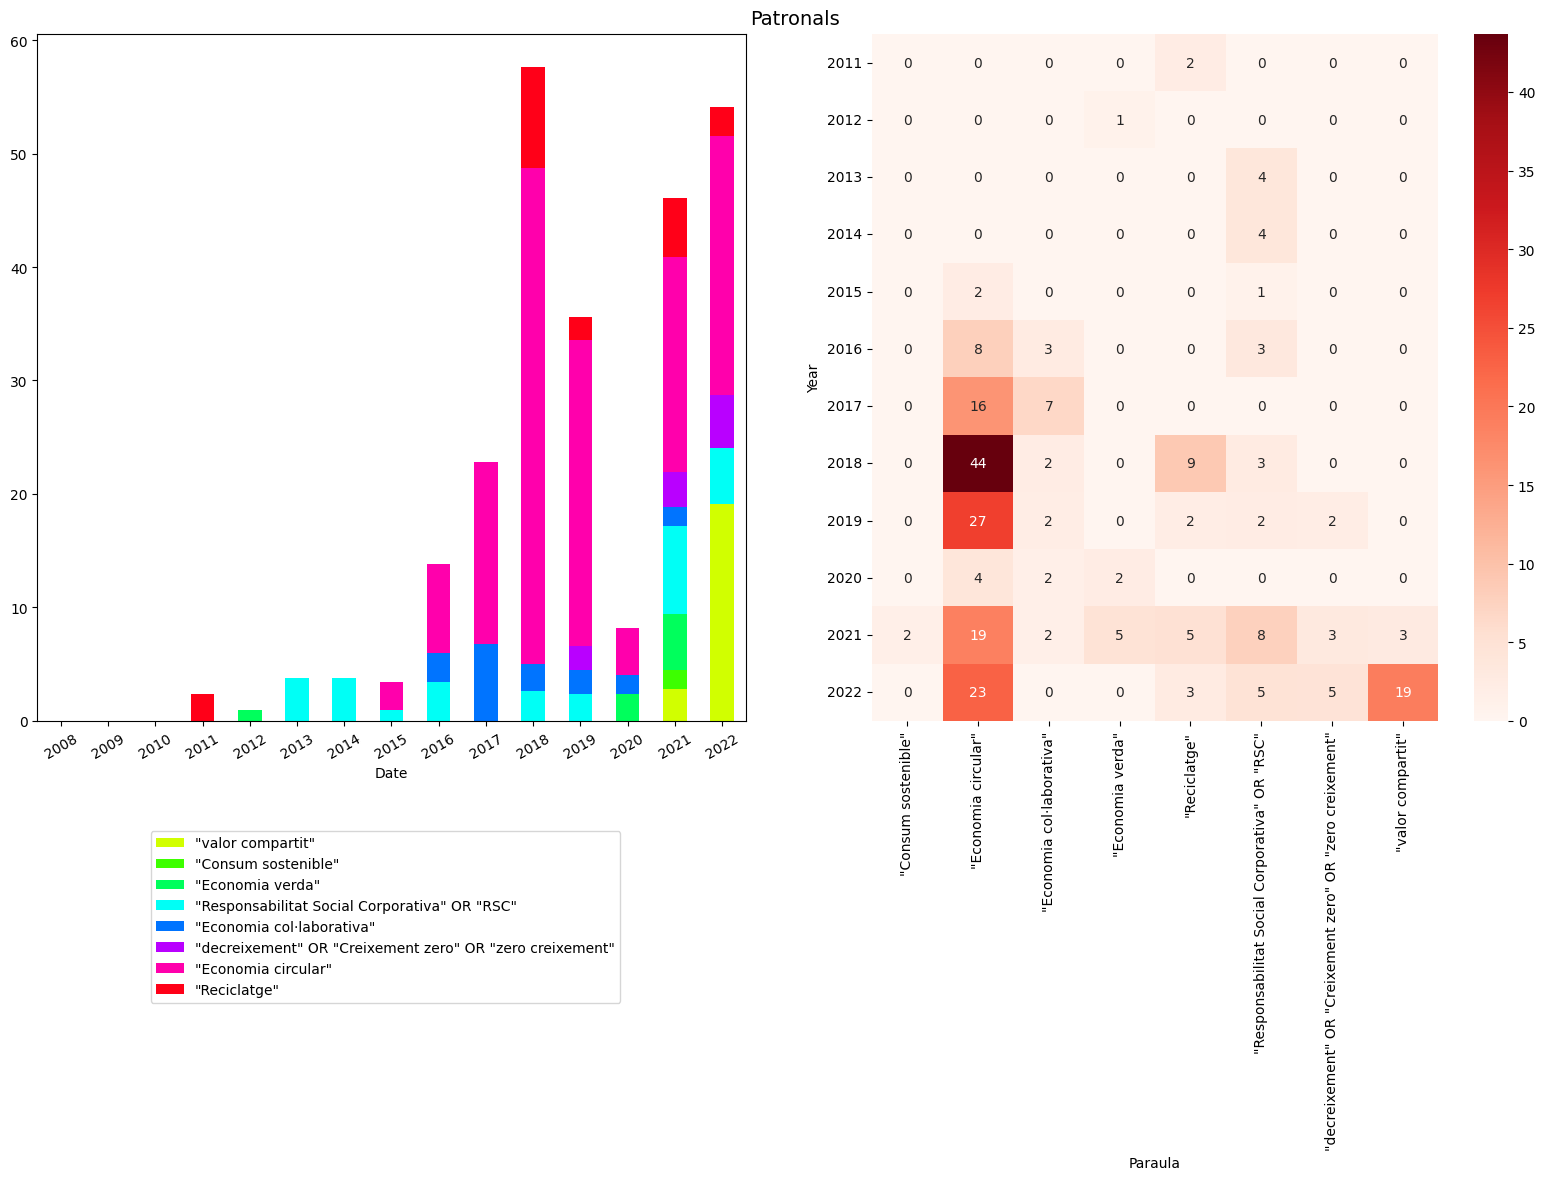

Button(description='Download data', layout=Layout(height='40px', margin='25px', width='140px'), style=ButtonSt…

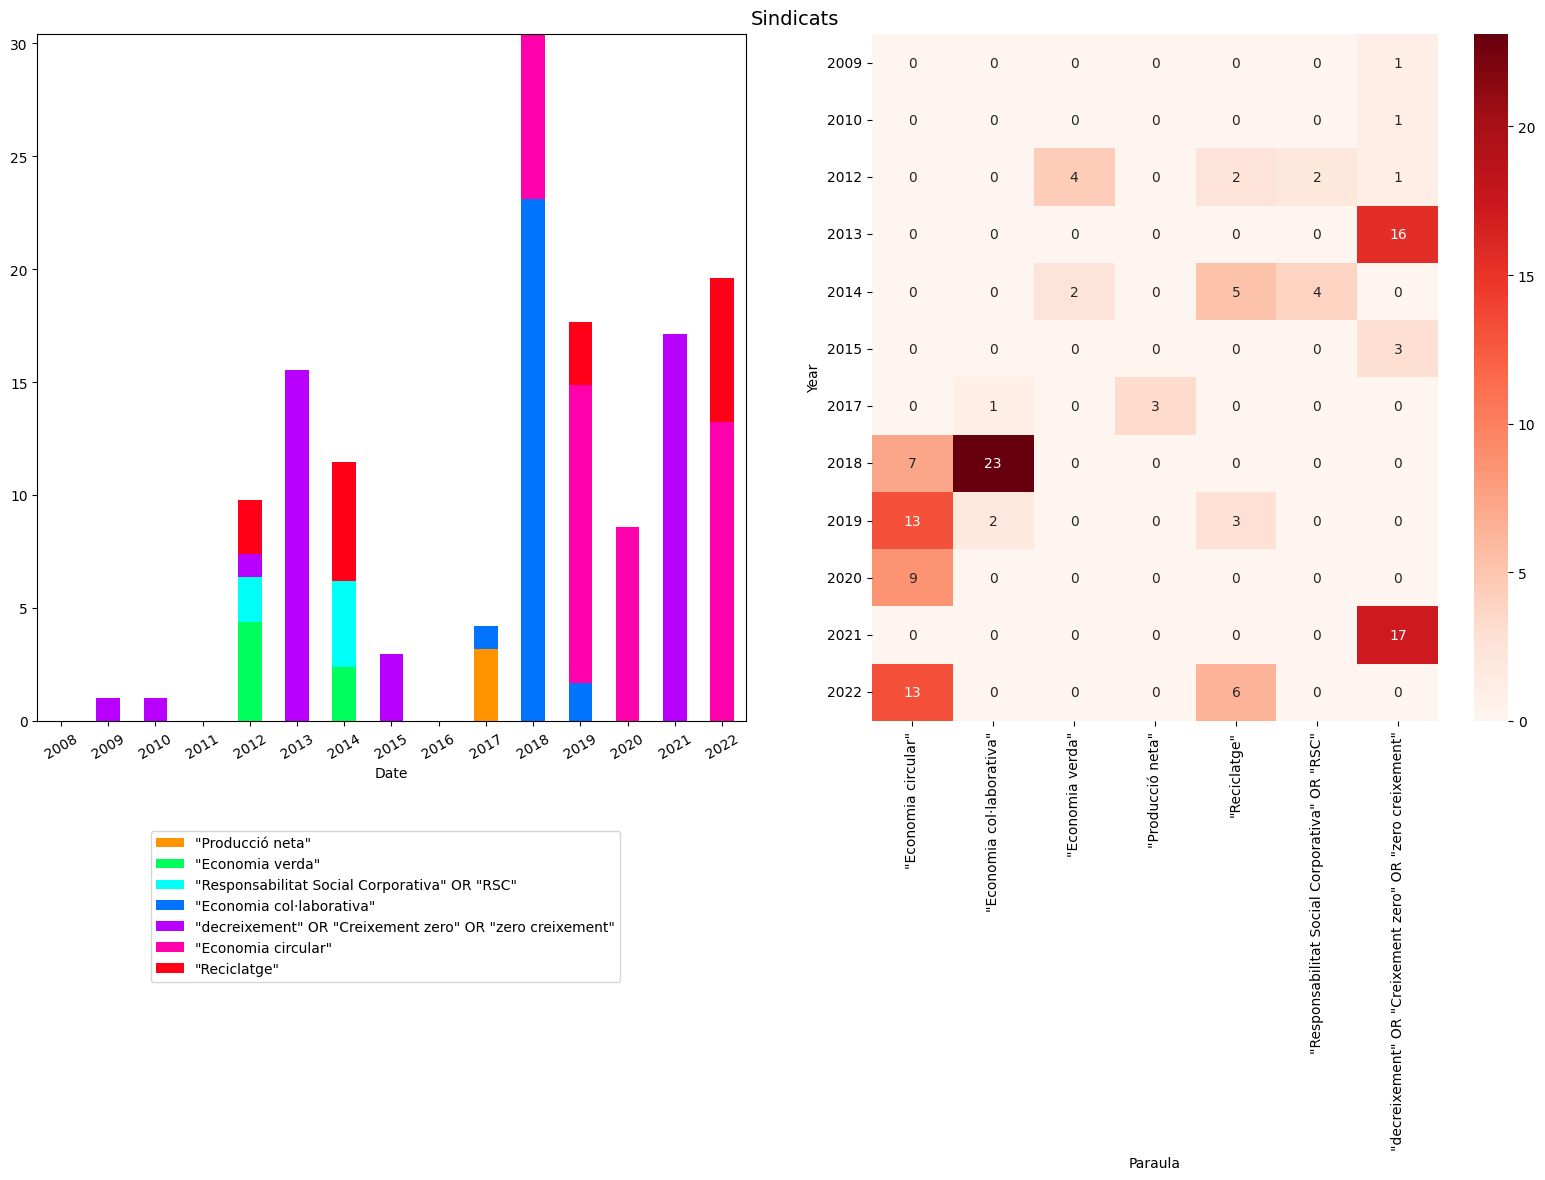

Button(description='Download data', layout=Layout(height='40px', margin='25px', width='140px'), style=ButtonSt…

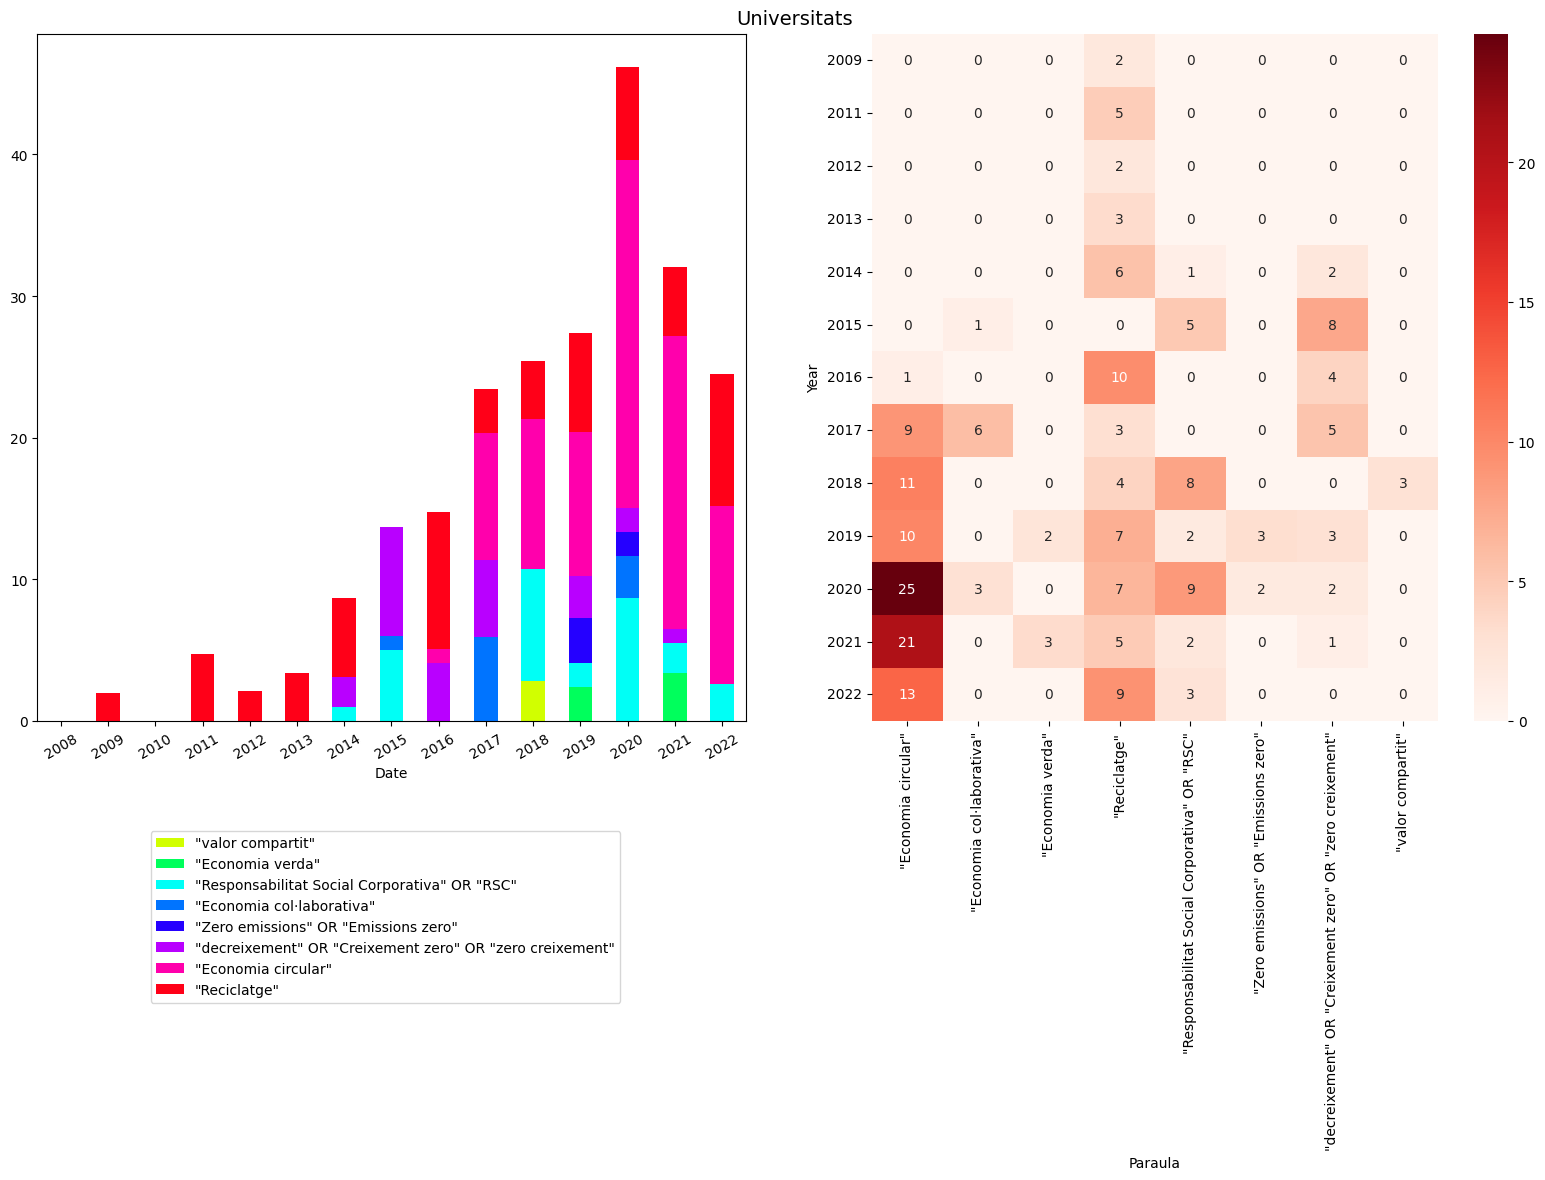

Button(description='Download data', layout=Layout(height='40px', margin='25px', width='140px'), style=ButtonSt…

In [164]:
#@title Mateix gràfic separat per grups
for j,group in enumerate(np.unique(T['Grup'])):
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))
    fig.subplots_adjust(wspace=0.45)
    fig.suptitle(group, fontsize=14)
    bot = zero.copy()
    Tg = T[T['Grup']==group]
    for i, paraula in enumerate(list(T['Paraula'].value_counts().sort_values().keys())):
        if(np.sum(Tg['Paraula']==paraula)>0):
            Tp = Tg[Tg['Paraula']==paraula]
            year = (zero + Tp.groupby(pd.Grouper(key='Date', freq='Y'))['Index'].sum()).fillna(0)
            year.plot(kind='bar',color=colors[i],label=paraula,bottom=bot, ax=axs[0])
            bot += year
            axs[0].legend(bbox_to_anchor=(0.15, -0.15),fontsize="10" ,loc='upper left')
    axs[0].set_xticks(np.arange(15))
    axs[0].set_xticklabels(np.arange(2008,2023),rotation=30)


    pivot = pd.pivot_table(Tg, index=pd.Grouper(key='Date', freq='Y'), columns='Paraula', values='Index', aggfunc=np.sum).fillna(0)

    sns.heatmap(pivot, cmap='Reds', annot=True, fmt='.0f', ax=axs[1])

    axs[1].set_xlabel('Paraula')
    axs[1].set_ylabel('Year')
    axs[1].yaxis.set_ticklabels(pivot.index.strftime('%Y'))

    plt.tight_layout()
    plt.show()

    button_download_df(pivot,'Twits_Paraula_Year_'+group)


# Anàlisi de tots els twits en català que continguin les paraules


In [165]:
#@title <h5> fix some variable
T_All['Date'] = pd.to_datetime(T_All['Date'],errors='coerce')

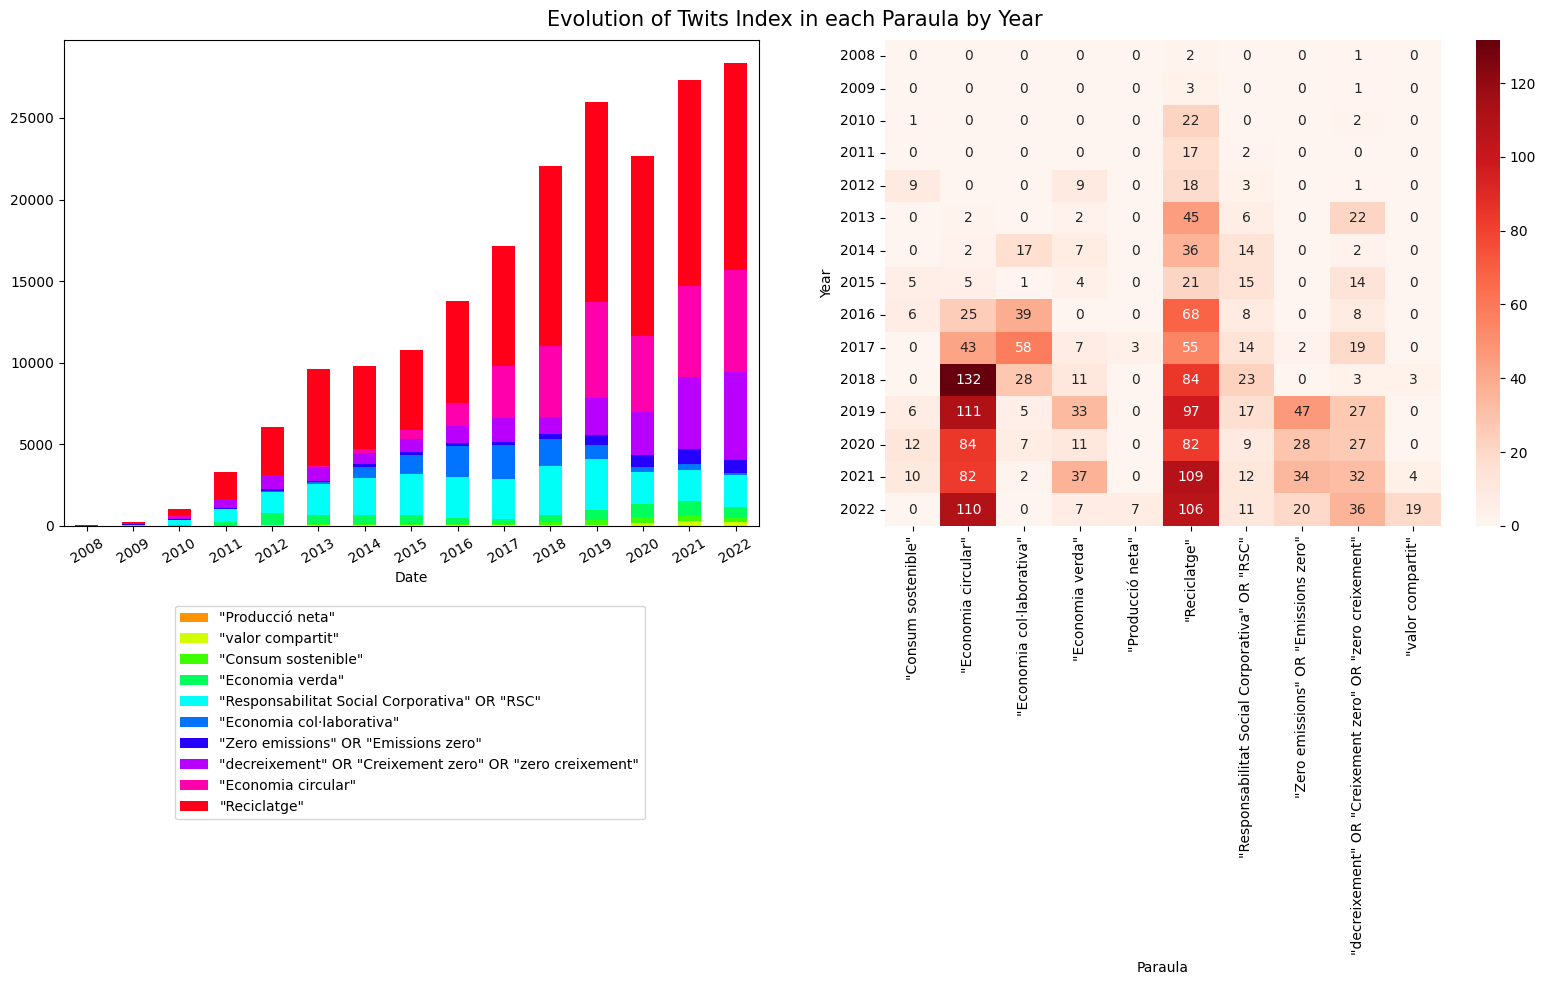

Button(description='Download data', layout=Layout(height='40px', margin='25px', width='140px'), style=ButtonSt…

In [166]:
#@title Evolució del nombre de Twits Index en cada paraula per any
fig, ax = plt.subplots(figsize=(16,10), ncols=2)
fig.subplots_adjust(wspace=0.45)
hsv = plt.get_cmap('hsv')
colors = hsv(np.linspace(0.1, 1, len(np.unique(T['Paraula']))))
bot = T_All.groupby(pd.Grouper(key='Date', freq='Y'))['Index'].sum()
bot -= bot
zero = bot.copy()

fig.suptitle('Evolution of Twits Index in each Paraula by Year', fontsize=15)


for i, paraula in enumerate(list(T['Paraula'].value_counts().sort_values().keys())):
    T_p = T_All[T_All['Paraula']==paraula]
    year = (zero + T_p.groupby(pd.Grouper(key='Date', freq='Y'))['Index'].sum()).fillna(0)
    year.plot(kind='bar', color=colors[i], label=paraula, bottom=bot, ax=ax[0])
    bot += year
    ax[0].legend(bbox_to_anchor=(0.15, -0.15),fontsize="10" ,loc='upper left')
ax[0].set_xticks(np.arange(15))
ax[0].set_xticklabels(np.arange(2008, 2023), rotation=30)

# plot 2: heatmap
pivot = pd.pivot_table(T, index=pd.Grouper(key='Date', freq='Y'), columns='Paraula', values='Index', aggfunc=np.sum).fillna(0)

sns.heatmap(pivot, cmap='Reds', annot=True, fmt='.0f', ax=ax[1])



ax[1].set_xlabel('Paraula')
ax[1].set_ylabel('Year')
ax[1].yaxis.set_ticklabels(pivot.index.strftime('%Y'))

# adjust layout
plt.tight_layout()
plt.show()

button_download_df(pivot,'Twits_Paraula_Year_ALL')

In [167]:
#@title Percentatge de twits amb localització

print('Percentatge de twits amb localització : {:.3} %'.format(sum(~pd.isna(T_All['Coords']))/len(T_All['Coords'])*100))

print("Percentatge d'usuaris únics representats : {:.3} %".format(len(T_All[~pd.isna(T_All['Coords'])].User.unique())/len(T_All.User.unique())*100))

Percentatge de twits amb localització : 3.19 %
Percentatge d'usuaris únics representats : 6.34 %


In [168]:
#@title <h5>Extreure latitud i longitud
def extreure(coordenada,xy='long'):
    if(type(coordenada)!=str):
        return coordenada
    lon, lat = coordenada.replace("Coordinates(", "").replace(")", "").replace("longitude=", "").replace("latitude=", "").split(",")
    if(xy=='long'):
        return float(lon)
    return float(lat)

T_All["long"] = T_All["Coords"].apply(extreure,xy = 'long')
T_All["lat"] = T_All["Coords"].apply(extreure,xy = 'lat')

T_mapa = T_All[~pd.isna(T_All['Coords'])][['long','lat']].drop_duplicates()

In [169]:
#@title <h6>old map
# import plotly.express as px
# import pandas as pd

# mapbox_token = "pk.eyJ1IjoiYXp1YmFyY28iLCJhIjoiY2s0OHRtbDNsMGI5YTNrcHJueWV3N20zdCJ9.qpTrQEyiBNskROz38Ggc3Q" 

# fig = px.scatter_mapbox(T_All,
#                         lat="lat",
#                         lon="long",
#                         zoom=4,
#                         size='Index')

# fig.update_layout(mapbox_accesstoken=mapbox_token)
# fig.write_html("mapa.html")
# fig.show()


In [170]:
#@title Definir variables mapes
comarques = gpd.read_file('https://github.com/AlbertRoca29/EconomiaCircular/blob/main/plantilles_mapes_shp/comarques.zip?raw=true!comarques.shp')
provincies = gpd.read_file('https://github.com/AlbertRoca29/EconomiaCircular/blob/main/plantilles_mapes_shp/provincies.zip?raw=true!provincies.shp')
municipis = gpd.read_file('https://github.com/AlbertRoca29/EconomiaCircular/blob/main/plantilles_mapes_shp/municipis.zip?raw=true!municipis.shp')

paisos_catalans = ["Alacant/Alicante", "Castelló/Castellón", "València/Valencia","Barcelona","Illes Balears","Girona", "Tarragona","Lleida"]
Area_metro = [
"la Palma de Cervelló",
"Badia del Vallès",
"Viladecans",
"Torrelles de Llobregat",
"Tiana",
"Cerdanyola del Vallès",
"Sant Vicenç dels Horts",
"Barberà del Vallès",
"Santa Coloma de Gramenet",
"Santa Coloma de Cervelló",
"Sant Just Desvern",
"Sant Joan Despí",
"Sant Feliu de Llobregat",
"Sant Cugat del Vallès",
"Sant Climent de Llobregat",
"Sant Boi de Llobregat",
"Sant Andreu de la Barca",
"Sant Adrià de Besòs",
"Ripollet",
"el Prat de Llobregat",
"el Papiol",
"Pallejà",
"Montgat",
"Montcada i Reixac",
"Molins de Rei",
"l'Hospitalet de Llobregat",
"Gavà",
"Esplugues de Llobregat",
"Cornellà de Llobregat",
"Corbera de Llobregat",
"Cervelló",
"Castelldefels",
"Castellbisbal",
"Begues",
"Barcelona",
"Badalona"
]

provincies = provincies[provincies['NAMEUNIT'].isin(paisos_catalans)]
areaBCN = municipis[municipis['NOM_MUNI'].isin(Area_metro)]
geometry = [Point(xy) for xy in zip(T_mapa['long'], T_mapa['lat'])]

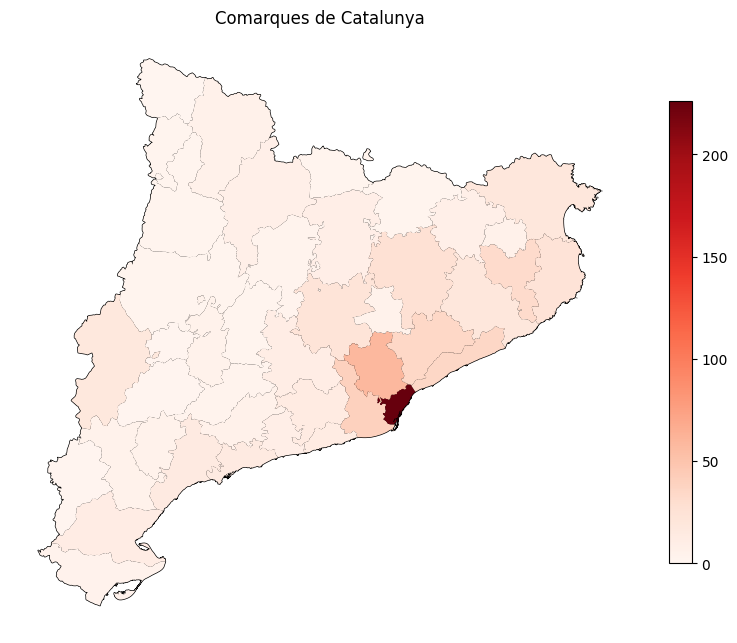

In [171]:
#@title Mapa Comarques
points = gpd.GeoDataFrame(T_mapa, geometry=geometry, crs='EPSG:4326').to_crs(comarques.crs)

sums = gpd.sjoin(comarques, points, how='left', predicate='contains').groupby('NOMCOMAR')['lat'].count()


fig, ax = plt.subplots(figsize=(10, 10))
comarques.plot(ax=ax, facecolor='lightgray', edgecolor='black')
comarques.join(sums, on='NOMCOMAR').plot(column='lat', cmap='Reds', ax=ax, legend=True,legend_kwds={'shrink': 0.6})
ax.set_axis_off()

plt.title('Comarques de Catalunya')

plt.show()

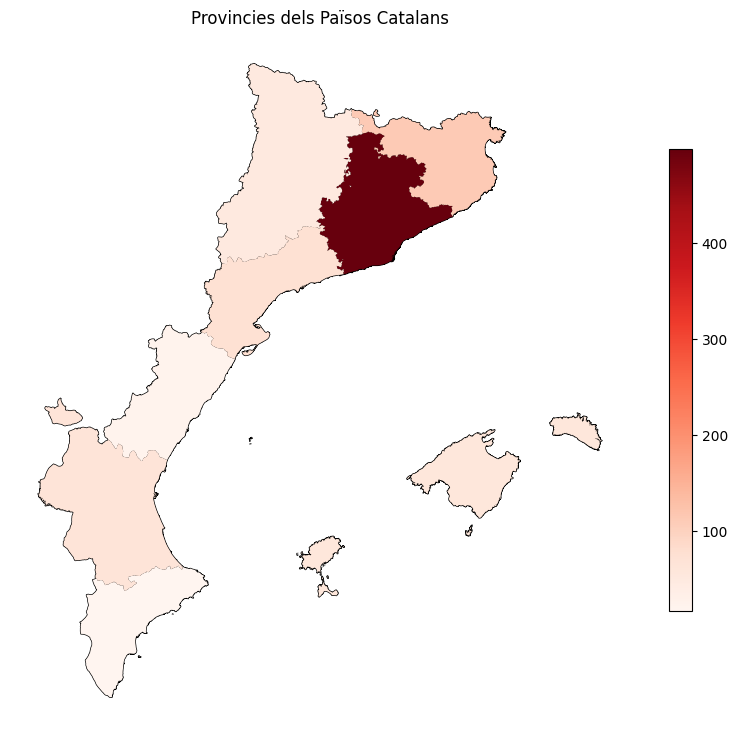

In [172]:
#@title Mapa Provincies Països Catalans
points = gpd.GeoDataFrame(T_mapa, geometry=geometry, crs='EPSG:4326').to_crs(provincies.crs)

sums = gpd.sjoin(provincies, points, how='left', predicate='contains').groupby('NAMEUNIT')['lat'].count()


fig, ax = plt.subplots(figsize=(10, 10))
provincies.plot(ax=ax, facecolor='lightgray', edgecolor='black')
provincies.join(sums, on='NAMEUNIT').plot(column='lat', cmap='Reds', ax=ax, legend=True,legend_kwds={'shrink': 0.6})
ax.set_axis_off()


plt.title('Provincies dels Països Catalans')

plt.show()

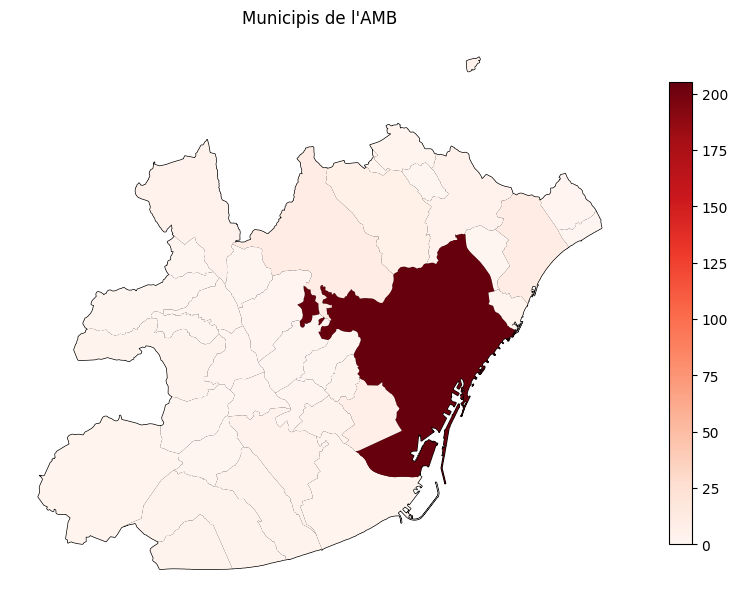

In [173]:
#@title Mapa municipis de l'àrea metropolitana de Barcelona
points = gpd.GeoDataFrame(T_mapa, geometry=geometry, crs='EPSG:4326').to_crs(areaBCN.crs)

sums = gpd.sjoin(areaBCN, points, how='left', predicate='contains').groupby('NOM_MUNI')['lat'].count()


fig, ax = plt.subplots(figsize=(10, 10))
areaBCN.plot(ax=ax, facecolor='lightgray', edgecolor='black')
areaBCN.join(sums, on='NOM_MUNI').plot(column='lat', cmap='Reds', ax=ax, legend=True,legend_kwds={'shrink': 0.6})
ax.set_axis_off()


plt.title("Municipis de l'AMB")

plt.show()